In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pulp

In [2]:
# Define the problem data (example values)
profit_A = 20
profit_B = 30
labor_A = 2
labor_B = 3
material_A = 1
material_B = 2
labor_limit = 50
material_limit = 40

In [4]:

model = pulp.LpProblem("Maximize_Profit", pulp.LpMaximize)

In [3]:
# Define decision variables
x1 = pulp.LpVariable("Product_A", lowBound=0, cat="Continuous")
x2 = pulp.LpVariable("Product_B", lowBound=0, cat="Continuous")


In [5]:
# Objective function
model += profit_A * x1 + profit_B * x2, "Total_Profit"

In [6]:
# Constraints
model += labor_A * x1 + labor_B * x2 <= labor_limit, "Labor_Constraint"
model += material_A * x1 + material_B * x2 <= material_limit, "Material_Constraint"

In [7]:
# Solve the problem
model.solve()

1

In [8]:
# Get results
product_A = x1.varValue
product_B = x2.varValue
total_profit = pulp.value(model.objective)

In [9]:
# Generate data for graphical representation
x_vals = np.linspace(0, 30, 100)
labor_constraint = (labor_limit - labor_A * x_vals) / labor_B
material_constraint = (material_limit - material_A * x_vals) / material_B

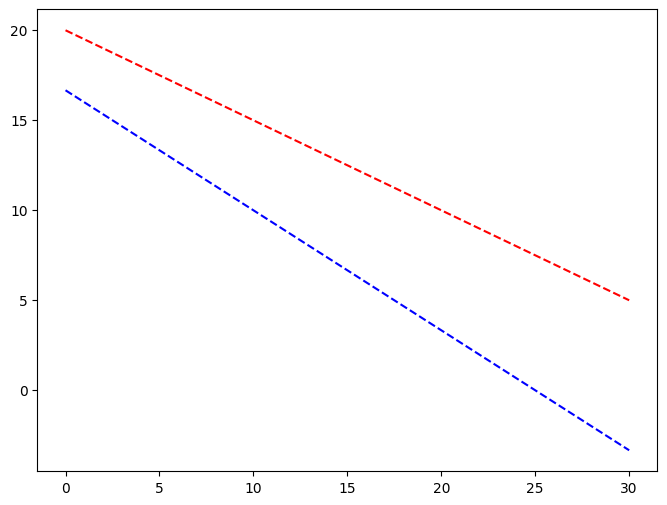

In [10]:
# Plot the feasible region
plt.figure(figsize=(8, 6))
plt.plot(x_vals, labor_constraint, label="Labor Constraint", linestyle="--", color="blue")
plt.plot(x_vals, material_constraint, label="Material Constraint", linestyle="--", color="red")

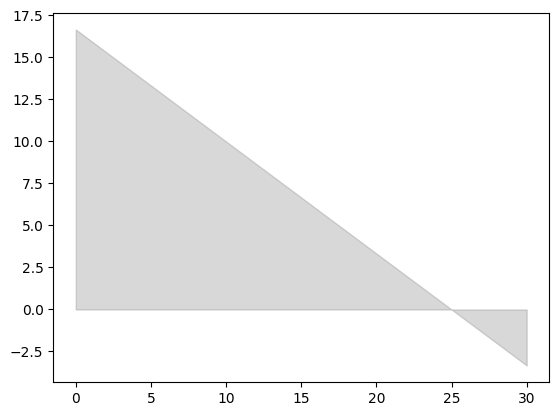

In [11]:
# Shade the feasible region
plt.fill_between(x_vals, np.minimum(labor_constraint, material_constraint), alpha=0.3, color="gray")

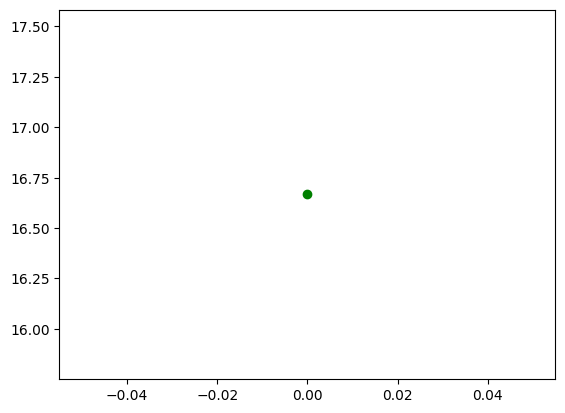

In [12]:
# Plot the optimal solution
plt.scatter(product_A, product_B, color="green", marker="o", label="Optimal Solution")

In [16]:
# Generate analysis report
analysis_text = f"""
Sensitivity Analysis Report:
------------------------------------
Profit per unit of Product A: {profit_A}
Profit per unit of Product B: {profit_B}
Labor required for Product A: {labor_A}
Labor required for Product B: {labor_B}
Material required for Product A: {material_A}
Material required for Product B: {material_B}
Total available labor hours: {labor_limit}
Total available raw materials: {material_limit}

Optimal Solution:
-----------------
Optimal number of units for Product A: {product_A}
Optimal number of units for Product B: {product_B}
Maximum Profit (Z): ${total_profit}
"""

In [17]:
sensitivity_file = "sensitivity_analysis.txt"
with open(sensitivity_file, "w") as f:
    f.write(analysis_text)